# $$
M \frac{d^2x}{dt^2} + kx = a\frac{x^3}{6}
$$

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
t = np.linspace(0,10,1000)
m = 1
k = 1
a = 1

# Euler's Iteration Method:

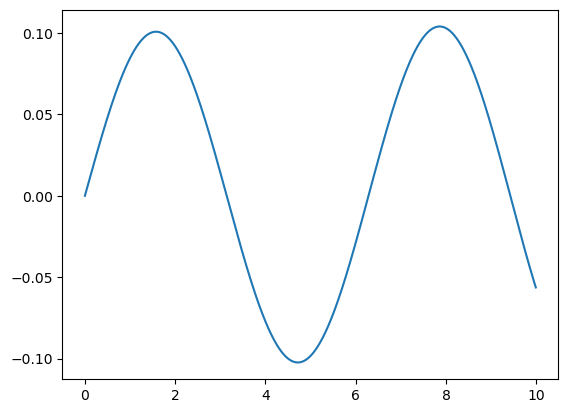

In [3]:
t0 = 0
tf = 10  
dt = 0.01  

x0 = 0
v0 = 0.1

def acceleration(x):
    return (a * x**3) / (6 * m) - (k * x) / m

t_values = np.arange(t0, tf, dt)
x_values = [x0]
v_values = [v0]

for ti in t_values[:-1]:
    x = x_values[-1]
    v = v_values[-1]
    a = acceleration(x)
    x_new = x + v * dt
    v_new = v + a * dt
    x_values.append(x_new)
    v_values.append(v_new)
plt.plot(t_values,x_values)

# Python Built-in Methods

In [4]:
def dsdx(x,s):
    y1, y2 = s
    return [y2, (a / (6*m) * y1**3) - (k / m * y1)]

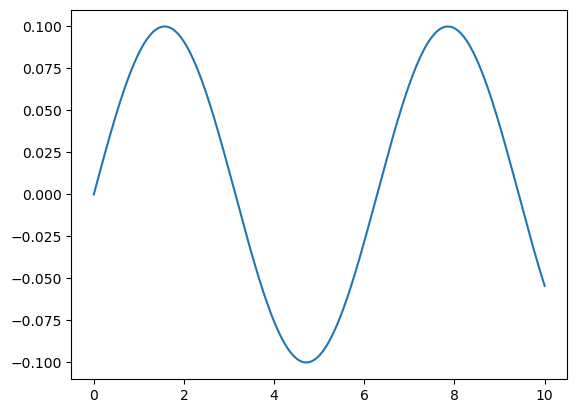

In [5]:
y1_0 = 0
y2_0 = 0.1
s_0 = (y1_0,y2_0)
sol1 = odeint(dsdx, y0 = s_0, t=t , tfirst=True)
y1_sol = sol1.T[0]
plt.plot(t,y1_sol)

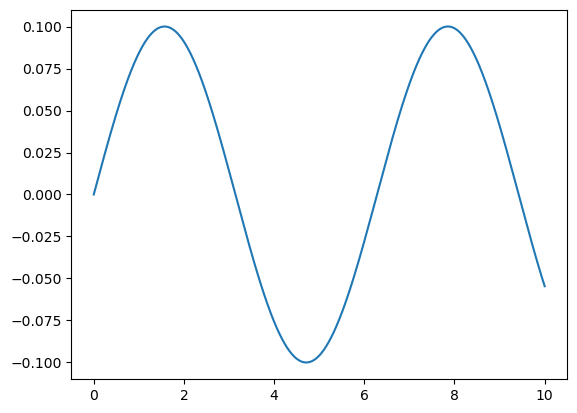

In [8]:
def odesys(t, y):
    y1, y2 = y
    dydt = [y2, (a * y1**3) / (6 * m) - (k * y1) / m]
    return dydt

y_0 = [0, 0.1]  
t_span = [0, 10]  
sol2 = solve_ivp(odesys, t_span, y_0, t_eval=np.linspace(t_span[0], t_span[1], 1000))
t = sol2.t
x = sol2.y[0]
plt.plot(t,x)